In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

In [3]:
data = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.shape

(284807, 31)

In [6]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [7]:
data['Class'].value_counts(normalize=True)

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

<Axes: xlabel='Class'>

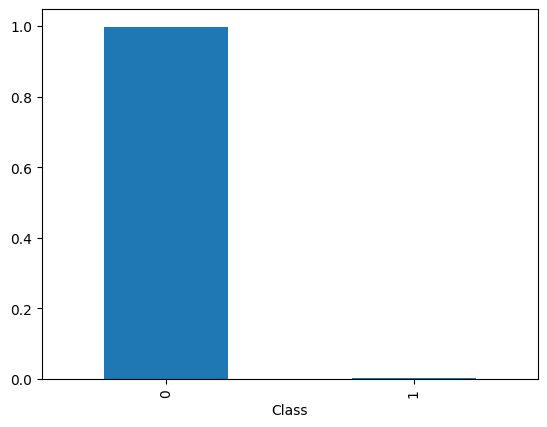

In [8]:
data['Class'].value_counts(normalize=True).plot(kind = 'bar')

In [9]:
# Undersampling

# 0 - 492
# 1 - 492

# Oversampling

# 0 - 284315
# 1 - 284315

In [10]:
# Imbalanaced Data
# It is a worst idea to go with Accuracy as a metrics
# Accuracy = 99.8%

In [11]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
X = data.drop(columns='Class')

In [14]:
y = data['Class']

In [15]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.2, random_state=42)

In [16]:
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((227845, 30), (56962, 30), (227845,), (56962,))

In [17]:
train_y.value_counts(), test_y.value_counts()

(Class
 0    227451
 1       394
 Name: count, dtype: int64,
 Class
 0    56864
 1       98
 Name: count, dtype: int64)

In [18]:
train_y.value_counts(normalize=True), test_y.value_counts(normalize=True)

(Class
 0    0.998271
 1    0.001729
 Name: proportion, dtype: float64,
 Class
 0    0.99828
 1    0.00172
 Name: proportion, dtype: float64)

In [19]:
decision_unbalanced_model = DecisionTreeClassifier()

In [20]:
decision_unbalanced_model.fit(train_X, train_y)

DecisionTreeClassifier()

In [21]:
train_pred = decision_unbalanced_model.predict(train_X)
test_pred = decision_unbalanced_model.predict(test_X)


In [22]:
print("Train Accuracy : ",accuracy_score(train_y, train_pred))
print("Test Accuracy : ",accuracy_score(test_y, test_pred))

Train Accuracy :  1.0
Test Accuracy :  0.9991573329588147


In [23]:
print("Train Report : \n",classification_report(train_y, train_pred))
print("Test Report : \n",classification_report(test_y, test_pred))

Train Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845

Test Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.74      0.80      0.76        98

    accuracy                           1.00     56962
   macro avg       0.87      0.90      0.88     56962
weighted avg       1.00      1.00      1.00     56962



In [24]:
def model_pred_result(train_X, test_X, train_y, test_y, model):
    model.fit(train_X, train_y)
    train_pred = model.predict(train_X)
    test_pred = model.predict(test_X)
    print("Train Accuracy : ",accuracy_score(train_y, train_pred))
    print("Test Accuracy : ",accuracy_score(test_y, test_pred))
    print("Train Report : \n",classification_report(train_y, train_pred))
    print("Test Report : \n",classification_report(test_y, test_pred))
    print("Train Confusion. Matrix : \n",confusion_matrix(train_y, train_pred))
    print("Test Confusion. Matrix  : \n",confusion_matrix(test_y, test_pred))  
    print("TRAIN ROC AUC SCORE  : \n",roc_auc_score(train_y, train_pred))
    print("Test ROC AUC SCORE  : \n",roc_auc_score(test_y, test_pred))
    
    y_pred_proba = model.predict_proba(test_X)[:, 1] 
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(test_y, y_pred_proba) 
    roc_auc = auc(fpr, tpr)
    # Plot the ROC curve
    plt.figure()  
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Fraudulent Transaction Classification')
    plt.legend()
    plt.show()
    
    return accuracy_score(train_y, train_pred), accuracy_score(test_y, test_pred)
    
    
    

Train Accuracy :  1.0
Test Accuracy :  0.9992275552122467
Train Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845

Test Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.75      0.83      0.79        98

    accuracy                           1.00     56962
   macro avg       0.87      0.91      0.89     56962
weighted avg       1.00      1.00      1.00     56962

Train Confusion. Matrix : 
 [[227451      0]
 [     0    394]]
Test Confusion. Matrix  : 
 [[56837    27]
 [   17    81]]
TRAIN ROC AUC SCORE  : 
 1.0
Test ROC AUC SCORE  : 
 0.9130278975687067


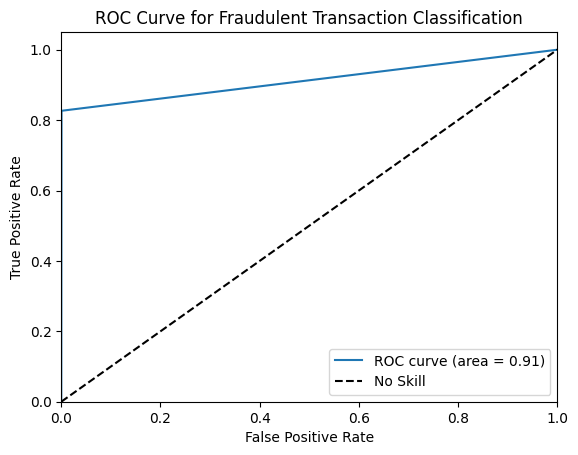

In [25]:
decision_unbalanced_model = DecisionTreeClassifier()
train_accuracy, test_accuracy = model_pred_result(train_X, test_X, train_y, test_y, decision_unbalanced_model)

Train Accuracy :  0.9999912221027453
Test Accuracy :  0.9979986657771848
Train Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227465
           1       1.00      0.99      1.00       380

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845

Test Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56850
           1       0.00      0.00      0.00       112

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962

Train Confusion. Matrix : 
 [[227465      0]
 [     2    378]]
Test Confusion. Matrix  : 
 [[56848     2]
 [  112     0]]
TRAIN ROC AUC SCORE  : 
 0.9973684210526316
Test ROC AUC SCORE  : 
 0.49998240985048376


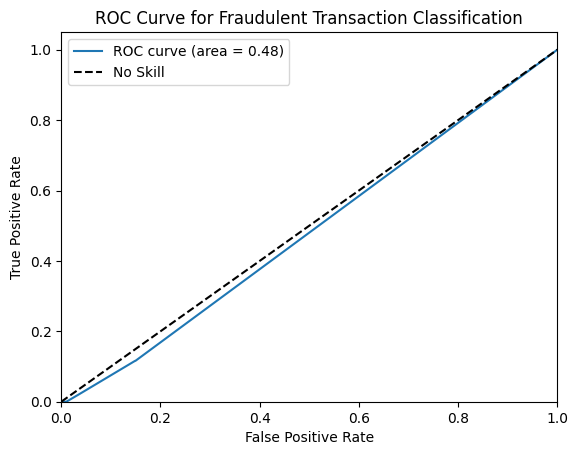

In [57]:
RandomForestClassifier_unbalanced_model = RandomForestClassifier()
train_accuracy, test_accuracy = model_pred_result(train_X, test_X, train_y, test_y, RandomForestClassifier_unbalanced_model)

In [26]:
data.corr()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


<Axes: >

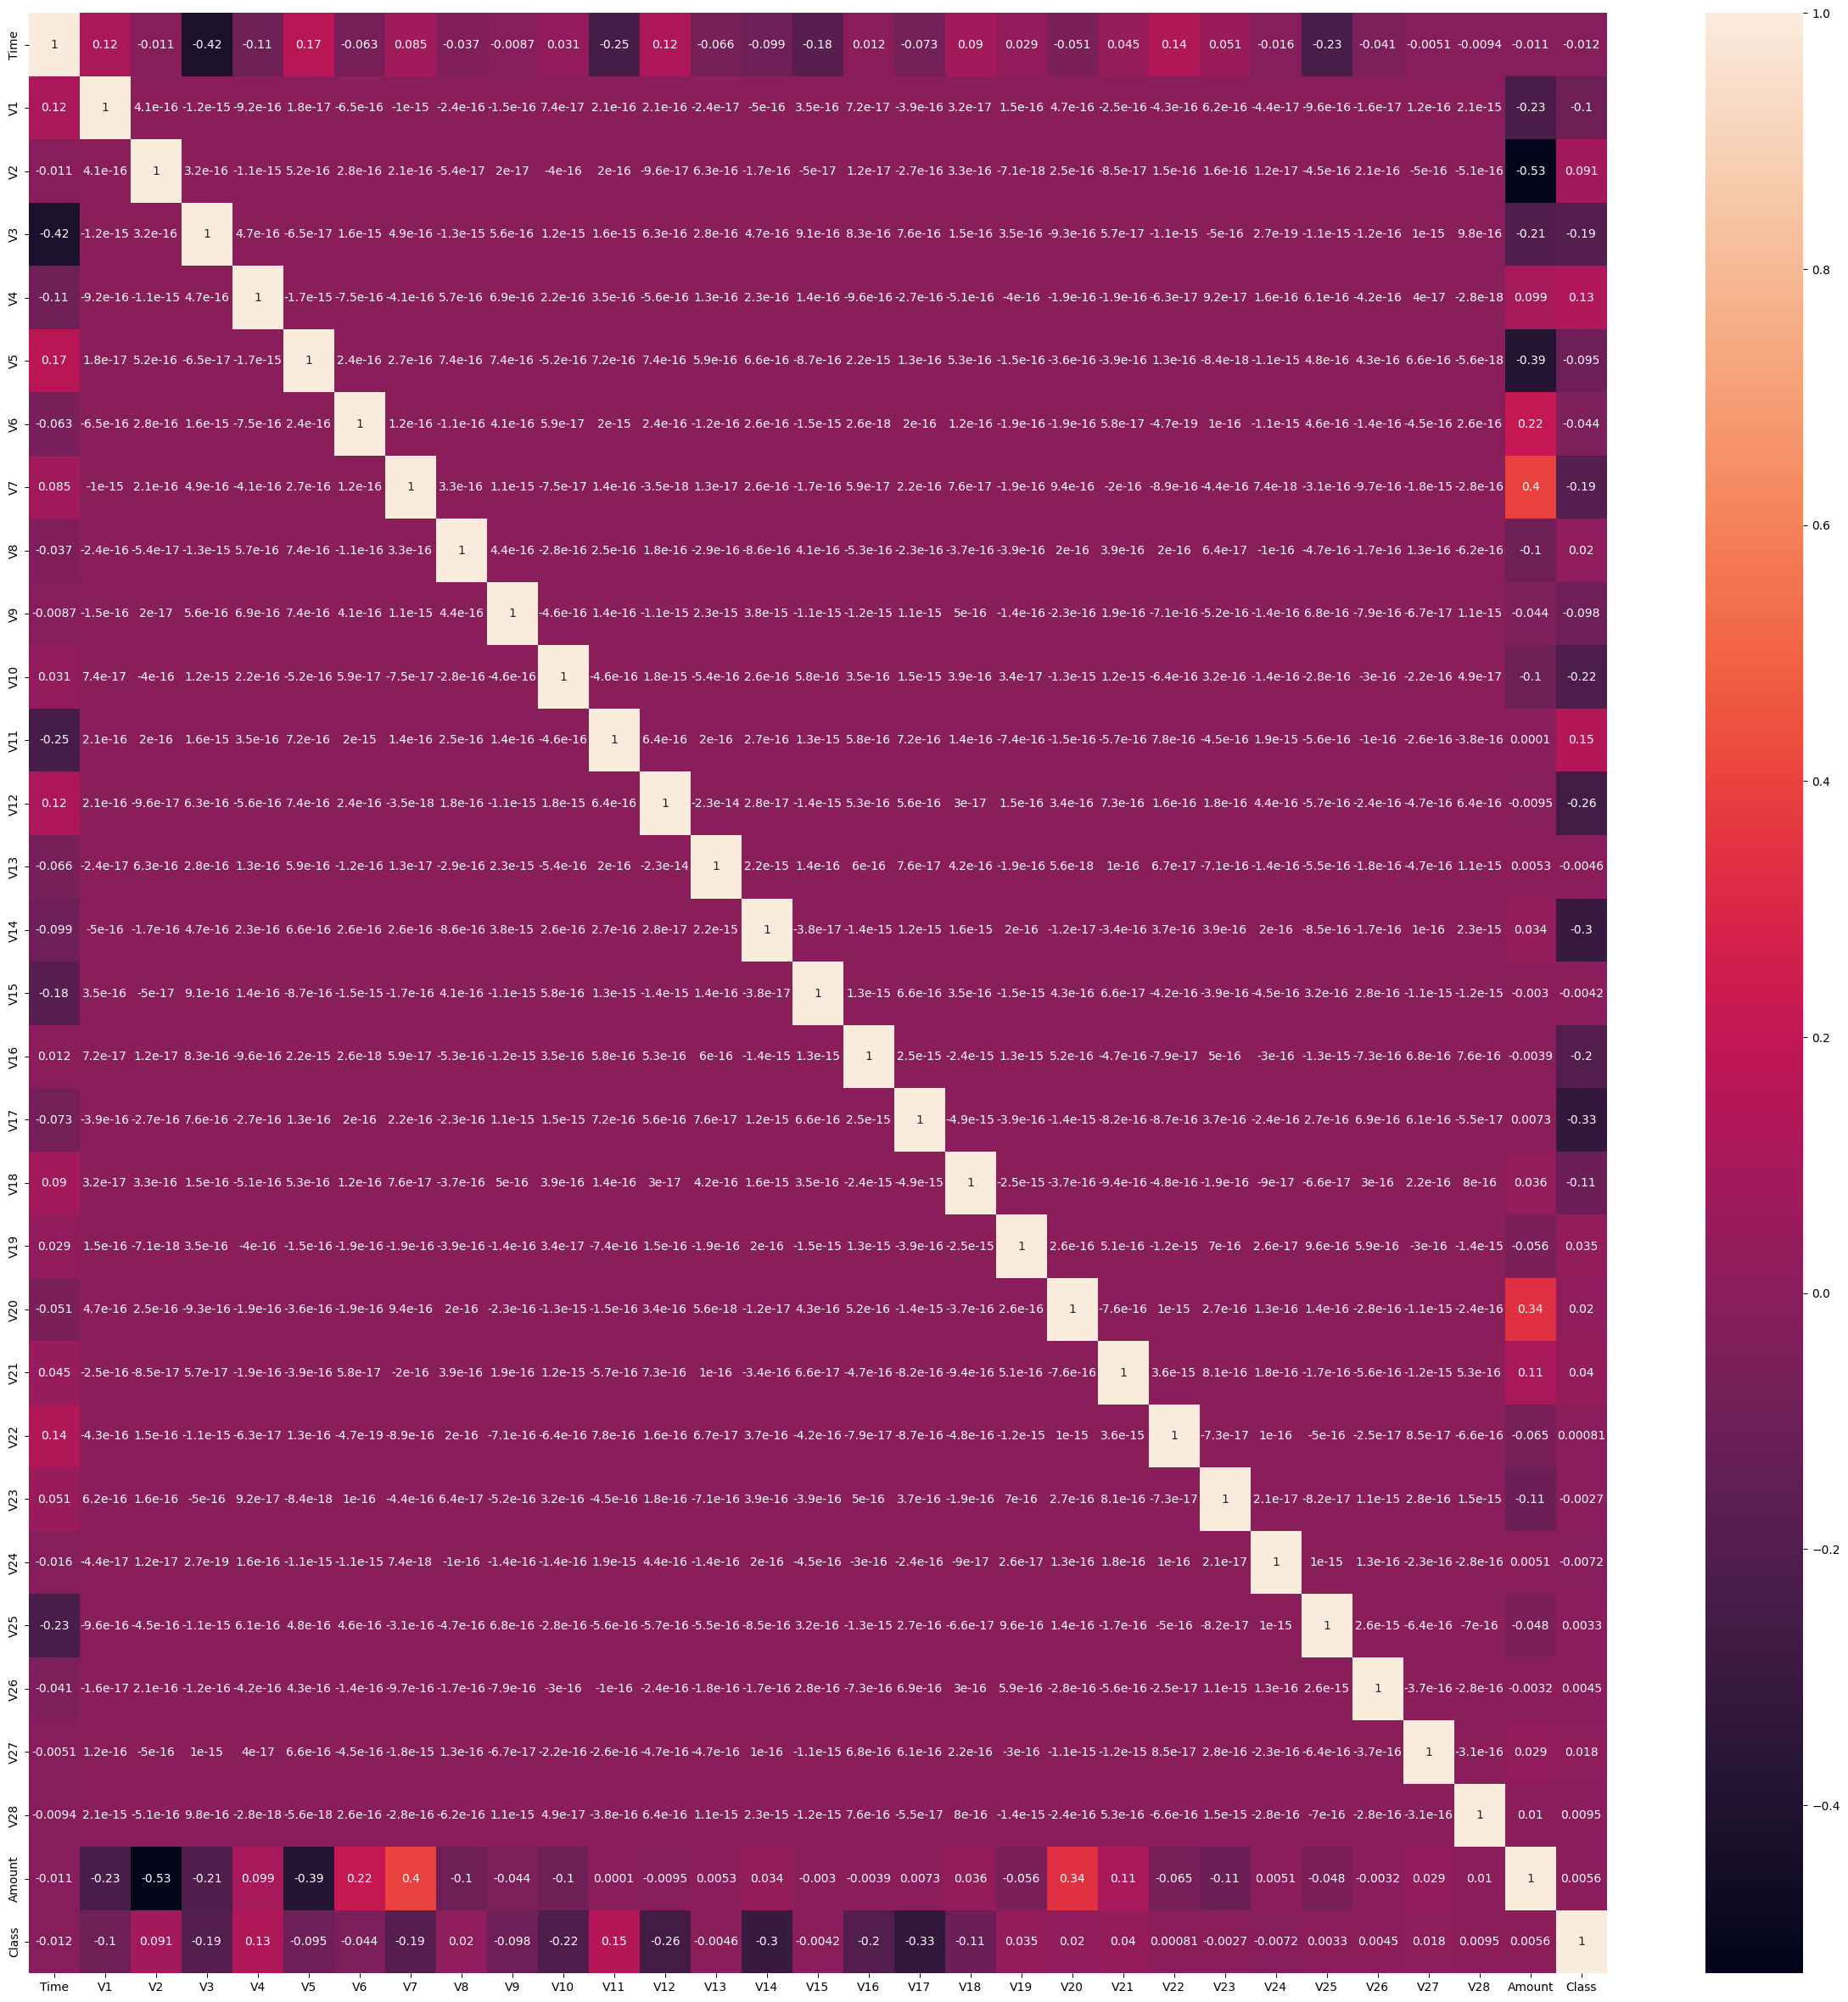

In [27]:
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(), annot=True)

In [28]:
# Experiment with Standard scaling

scale = StandardScaler()
X_scaled = pd.DataFrame(scale.fit_transform(X), columns=X.columns)

In [29]:
X_scaled

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.641931,-6.065842,6.099286,-6.486245,-1.459641,-3.886611,-1.956690,-3.975628,6.116573,1.742559,...,1.914365,0.290602,0.154146,1.624574,-0.841000,2.756320,0.518500,2.337901,2.495529,-0.350151
284803,1.641952,-0.374121,-0.033356,1.342145,-0.521651,0.629040,0.794446,0.019667,0.246886,0.532299,...,0.077330,0.291625,1.273781,0.019958,-1.677920,-1.163726,-0.819647,0.169641,-0.162164,-0.254117
284804,1.641974,0.980024,-0.182434,-2.143205,-0.393984,1.905833,2.275262,-0.239939,0.593140,0.393630,...,0.001811,0.315913,0.796788,-0.060053,1.056944,0.509797,-0.181182,0.011037,-0.080467,-0.081839
284805,1.641974,-0.122755,0.321250,0.463320,0.487192,-0.273836,0.468155,-0.554672,0.568631,0.356887,...,0.165300,0.361112,1.102451,-0.261503,0.203428,-1.091855,1.133635,0.269604,0.316687,-0.313249


In [30]:
data_scaled = pd.concat([X_scaled, y], axis = 1)

<Axes: >

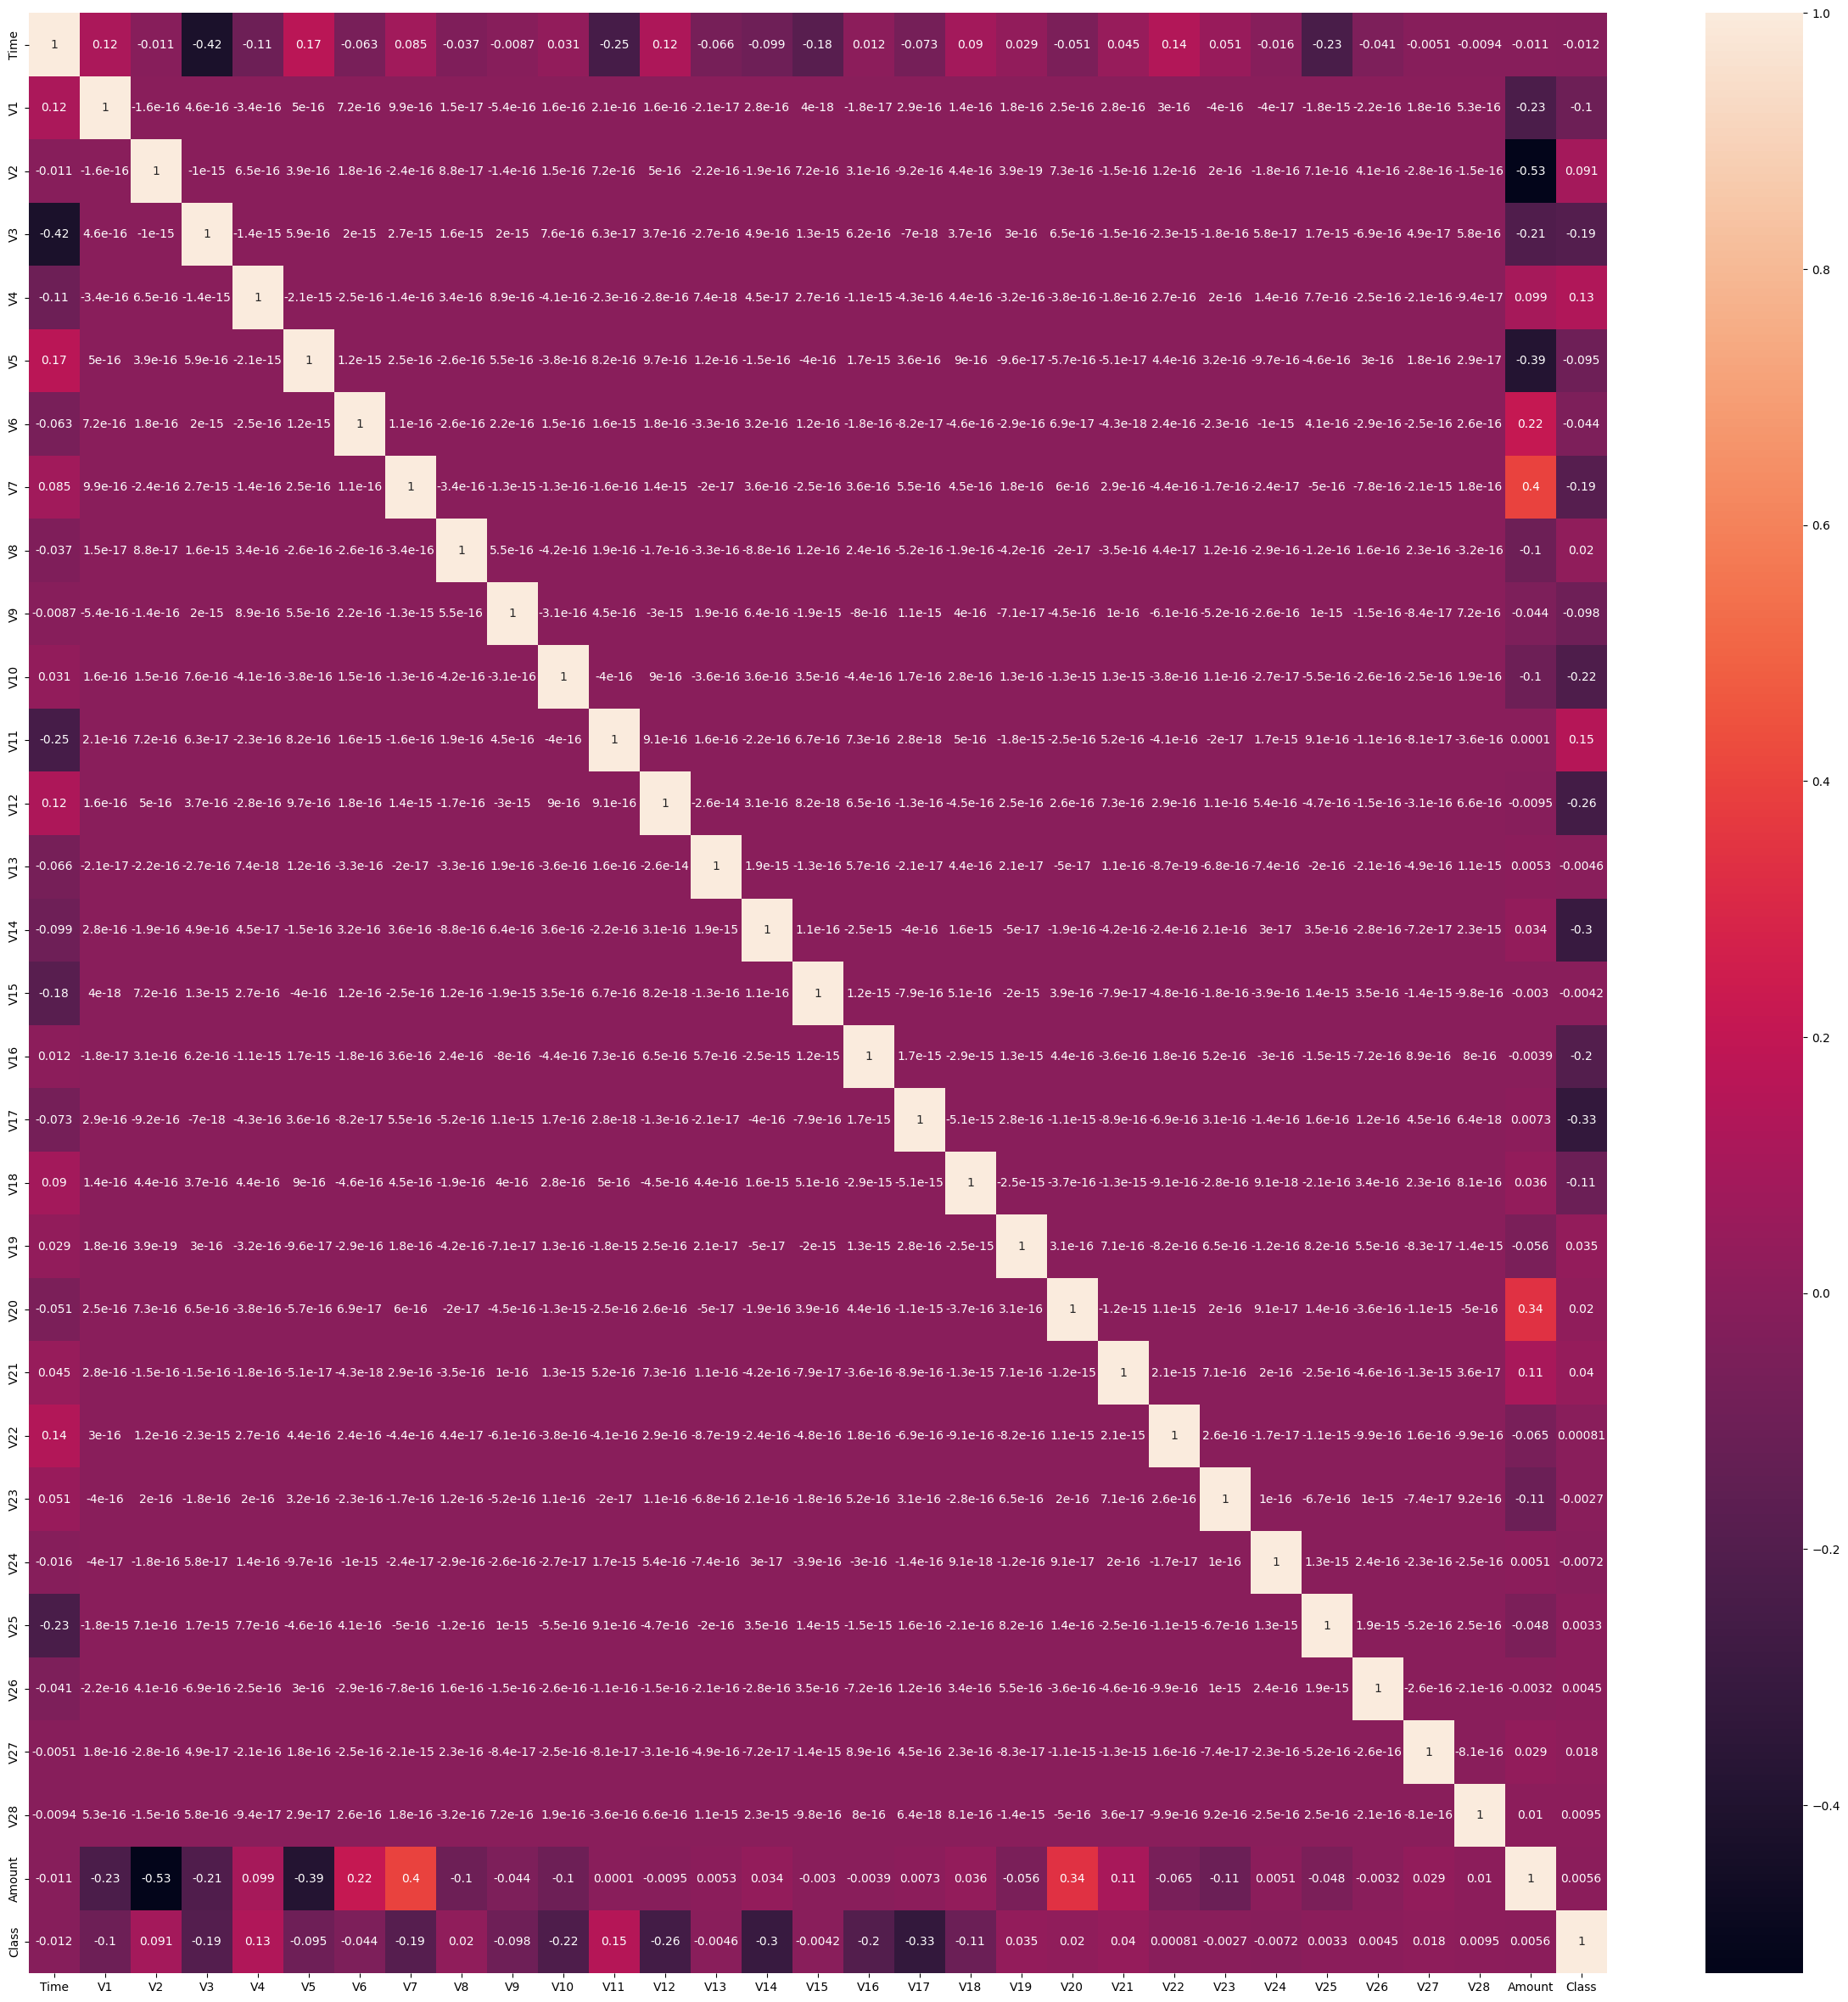

In [31]:
plt.figure(figsize=(30,30))
sns.heatmap(data_scaled.corr(), annot=True)

In [32]:
train_scaled_X, test_scaled_X,train_y, test_y = train_test_split(X_scaled, y, test_size=0.2, random_state=32)

In [33]:
train_scaled_X.shape, test_scaled_X.shape, train_y.shape, test_y.shape

((227845, 30), (56962, 30), (227845,), (56962,))

In [34]:
under_sampling = RandomUnderSampler()

In [35]:
train_y.value_counts()

Class
0    227465
1       380
Name: count, dtype: int64

In [36]:
train_scaled_under_sample_X, train_y_scaled_under_sample =  under_sampling.fit_resample(train_scaled_X, train_y)

In [37]:
train_data_scaled_undersample = pd.concat([train_scaled_under_sample_X,train_y_scaled_under_sample], axis = 1)

In [38]:
train_data_scaled_undersample['Class'].value_counts()

Class
0    380
1    380
Name: count, dtype: int64

<Axes: xlabel='Class'>

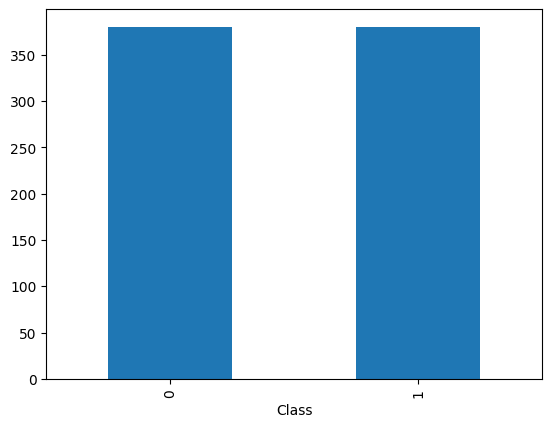

In [39]:
train_data_scaled_undersample['Class'].value_counts().plot(kind = 'bar')

<Axes: >

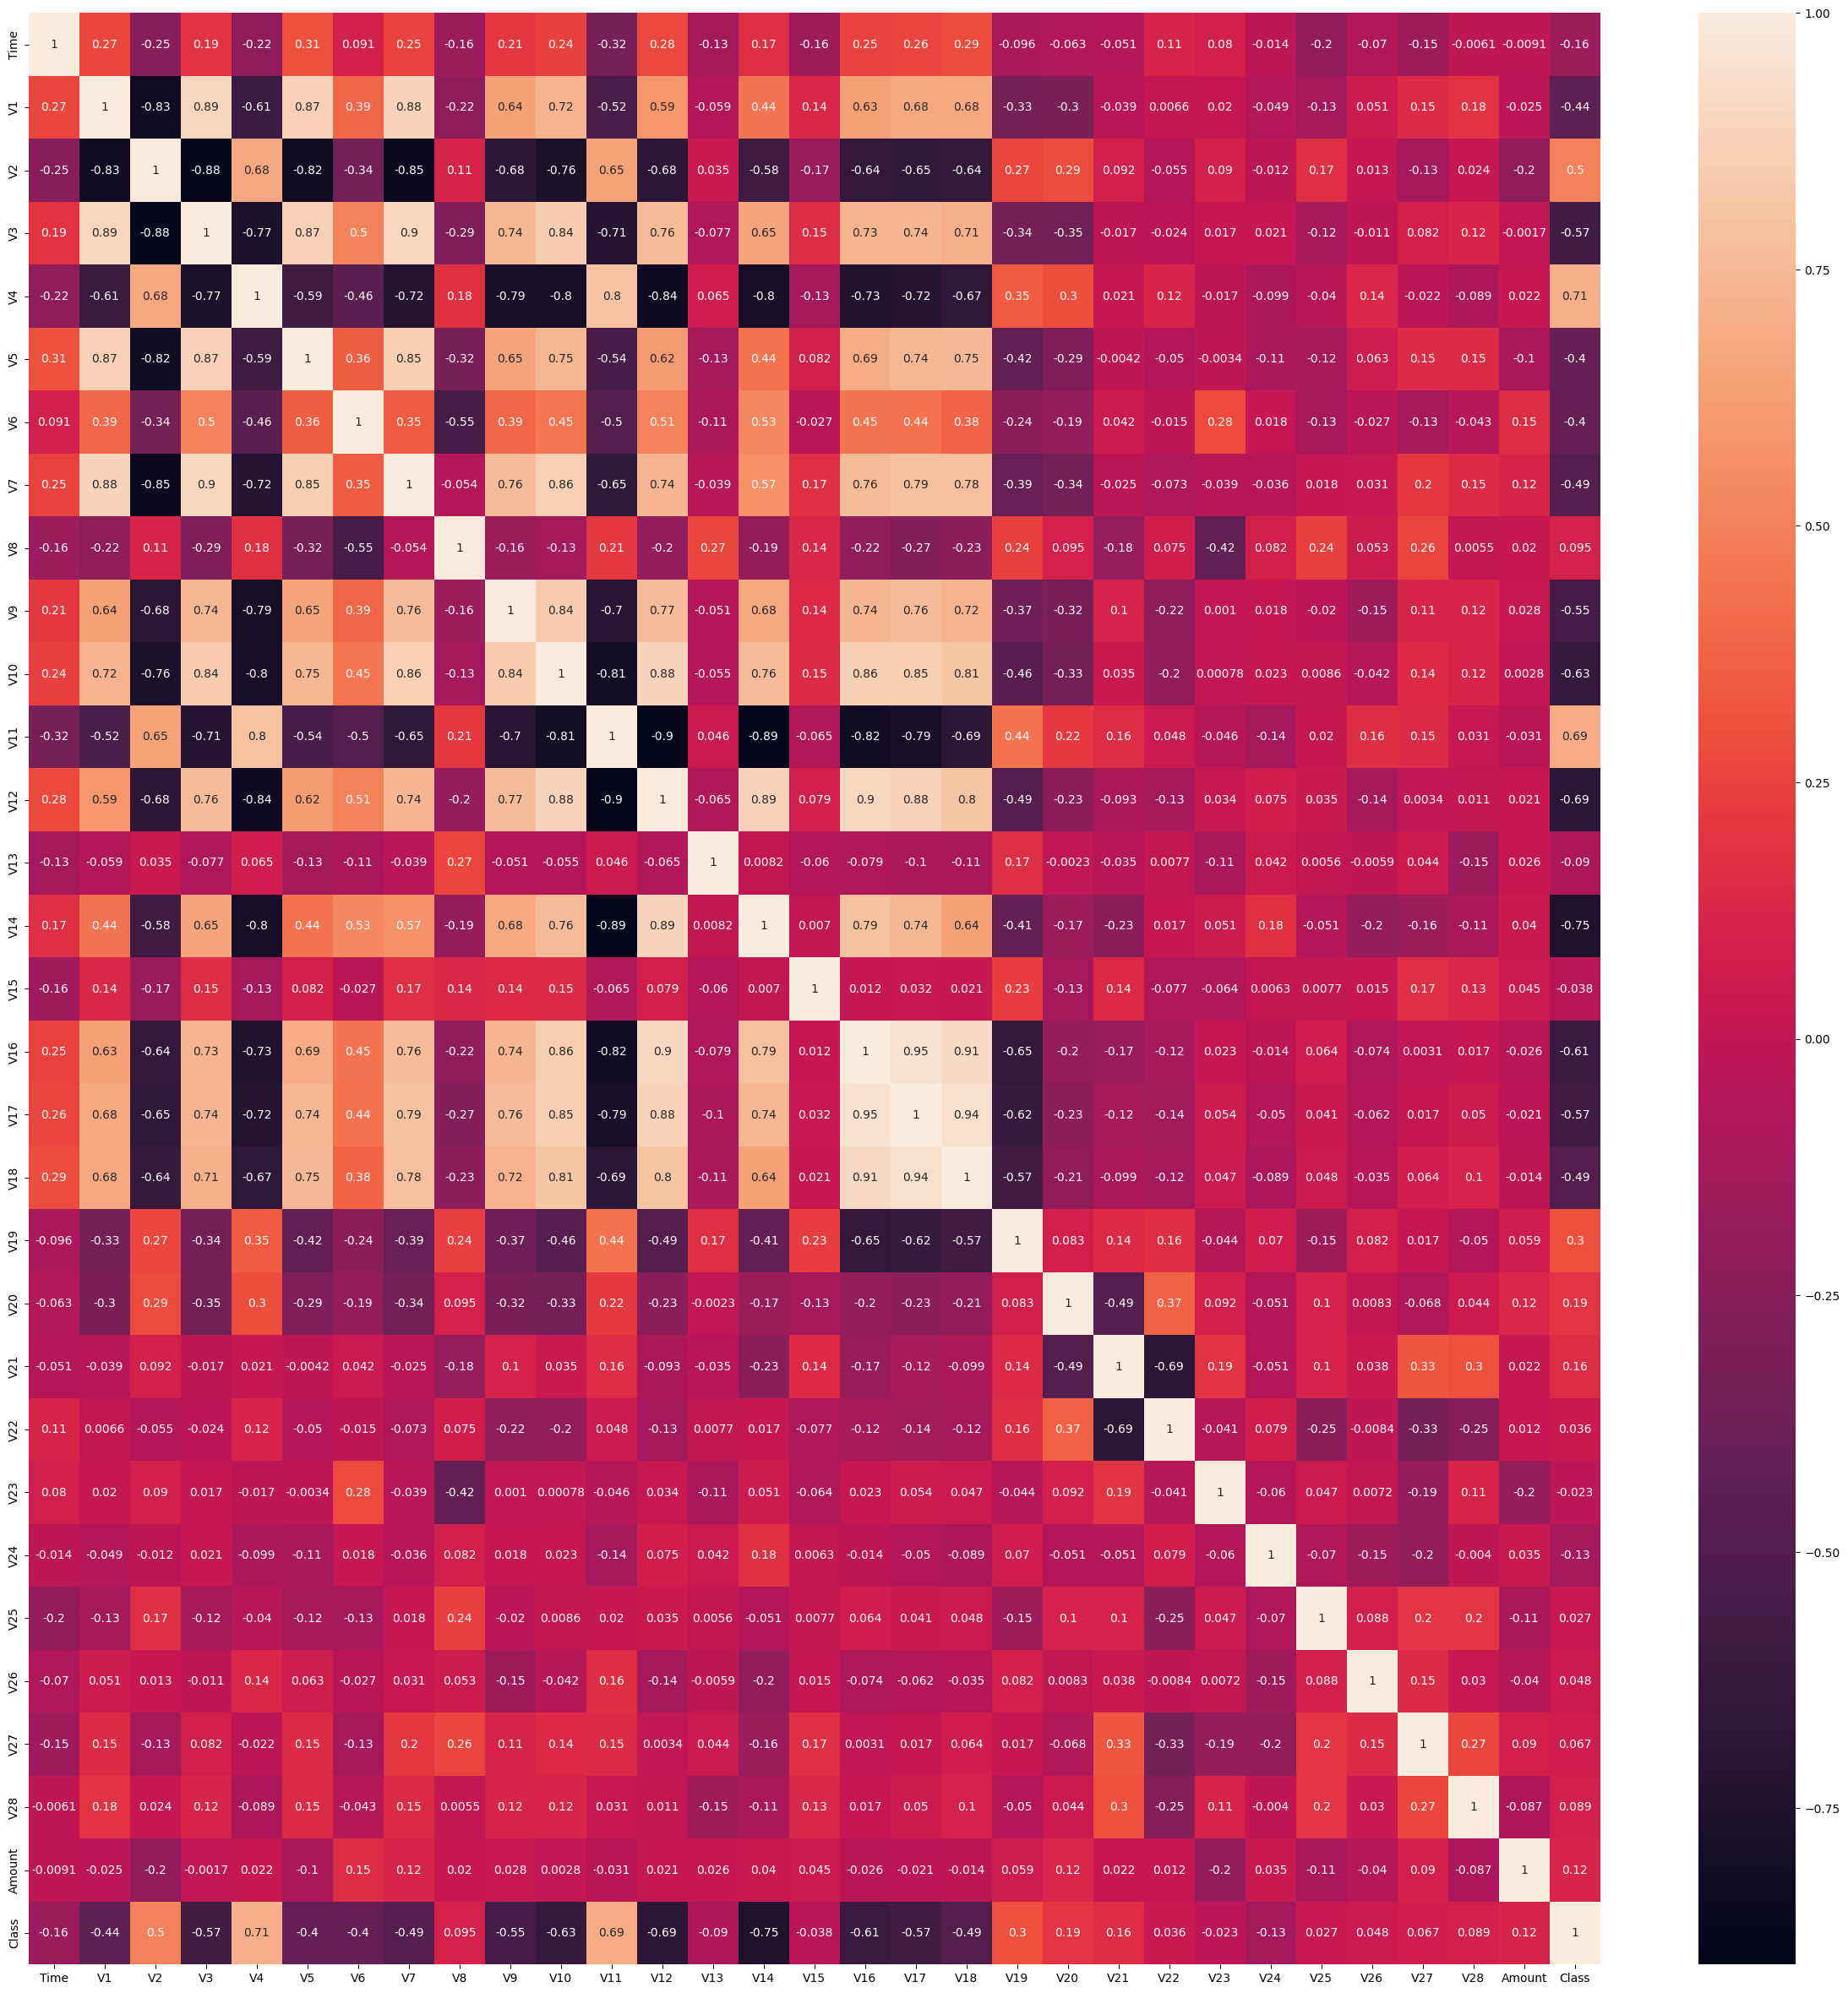

In [40]:
plt.figure(figsize=(30,30))
sns.heatmap(train_data_scaled_undersample.corr(), annot=True)

In [41]:
train_scaled_under_sample_X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
73441,-0.835533,-0.136838,-0.339538,0.444161,-0.967256,1.023597,2.874745,-1.008892,0.875251,-1.259823,...,0.876207,0.574278,1.230534,-0.314837,1.745501,0.744660,0.524007,0.103576,0.032150,-0.157323
230961,1.089603,0.747786,-0.614043,-2.103393,0.327675,0.642930,-0.574498,1.120062,-0.464475,-0.323259,...,0.678079,0.637598,0.927018,-1.040900,-1.621275,1.255770,1.517706,-0.494854,-0.152877,1.130061
23193,-1.309421,0.622385,0.086511,-0.469521,1.104605,1.574526,3.087051,-0.521590,0.830779,-0.293798,...,-0.079744,-0.184593,-0.473173,-0.178738,1.677437,1.505798,0.193692,0.028178,0.039086,-0.349231
181505,0.635721,-0.574660,-0.726806,0.520836,-1.521445,-0.587790,-0.199299,-0.625341,0.402025,-2.338682,...,0.136951,0.172185,0.366296,0.086678,-0.657341,-0.197105,-0.183076,0.016458,-0.155409,0.102552
85150,-0.719841,0.633668,-0.056089,-0.253725,0.030727,0.068071,-0.381745,0.264343,-0.247858,0.136197,...,0.175418,-0.136383,-0.325937,-0.441134,-0.743192,1.317414,2.363237,-0.250259,-0.009625,-0.073363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154697,0.164486,-2.155122,1.738697,-3.883731,4.866952,-2.466878,-0.866487,-6.256553,2.387375,-2.282450,...,-0.295595,2.206319,2.160599,-0.925613,-0.097491,-3.509014,-0.150197,0.338760,-1.817264,-0.322884
153823,0.113905,-10.028046,8.905883,-15.037891,8.556368,-10.793823,0.631087,-22.642864,-9.980015,-8.156450,...,4.974097,-11.203022,4.572380,4.139922,0.321984,-2.292069,0.079678,-10.224037,-1.955053,-0.344114
181966,0.639869,-0.392697,0.812819,-1.432119,-0.107011,-0.469753,-0.730712,-1.379573,0.262690,-1.804340,...,-0.132691,-0.049178,-1.038433,-0.075447,0.591918,-0.551351,0.988138,0.620691,0.760377,-0.193306
150601,-0.022571,-1.680266,2.665281,-5.536157,3.145481,-3.470440,-3.182678,-7.452158,1.652806,-2.651432,...,1.933874,2.862190,0.823164,-0.525393,0.735995,1.122782,-0.827424,5.242413,3.183275,-0.349231


In [42]:
test_X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
43428,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19
49906,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12
29474,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00
276481,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50
278846,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75723,56223.0,-1.994348,1.503076,-0.365560,0.780223,-0.957956,0.038648,-0.453702,1.553565,-0.561964,...,-0.316016,0.224820,0.319275,-0.081356,-0.366704,-0.269380,-0.278170,0.082042,-0.015071,75.69
252263,155726.0,-0.234567,0.733694,0.486250,-0.718186,0.782227,-0.788837,1.056307,-0.175016,-0.244864,...,-0.127503,-0.202040,-0.574857,-0.024845,-0.428558,-0.563551,0.159926,0.094924,0.163736,9.99
221246,142491.0,0.040441,-0.109737,-1.266430,1.004783,2.223390,-0.670372,0.490662,-0.033739,-0.307052,...,-0.008625,0.341151,0.930041,0.162391,-1.180279,-1.484172,-0.619133,0.357845,0.354379,7.63
81910,59157.0,-0.495048,0.991481,1.671584,-0.342474,0.470012,-0.348503,0.996077,-0.351891,-0.219231,...,0.424562,-0.324995,-0.474178,-0.145562,-0.011279,-0.162997,0.020511,0.040529,-0.269775,3.59


Train Accuracy :  1.0
Test Accuracy :  0.9068852919490187
Train Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       380
           1       1.00      1.00      1.00       380

    accuracy                           1.00       760
   macro avg       1.00      1.00      1.00       760
weighted avg       1.00      1.00      1.00       760

Test Report : 
               precision    recall  f1-score   support

           0       1.00      0.91      0.95     56850
           1       0.02      0.90      0.04       112

    accuracy                           0.91     56962
   macro avg       0.51      0.90      0.49     56962
weighted avg       1.00      0.91      0.95     56962

Train Confusion. Matrix : 
 [[380   0]
 [  0 380]]
Test Confusion. Matrix  : 
 [[51557  5293]
 [   11   101]]
TRAIN ROC AUC SCORE  : 
 1.0
Test ROC AUC SCORE  : 
 0.9043405264480463


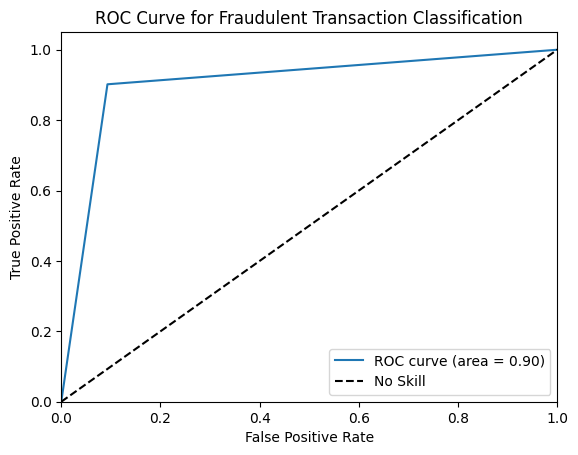

In [43]:
decision_unbalanced_model = DecisionTreeClassifier()
train_accuracy, test_accuracy = model_pred_result(train_scaled_under_sample_X, test_scaled_X, train_y_scaled_under_sample, test_y, decision_unbalanced_model)

Train Accuracy :  1.0
Test Accuracy :  0.980671324742811
Train Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       380
           1       1.00      1.00      1.00       380

    accuracy                           1.00       760
   macro avg       1.00      1.00      1.00       760
weighted avg       1.00      1.00      1.00       760

Test Report : 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56850
           1       0.08      0.88      0.15       112

    accuracy                           0.98     56962
   macro avg       0.54      0.93      0.57     56962
weighted avg       1.00      0.98      0.99     56962

Train Confusion. Matrix : 
 [[380   0]
 [  0 380]]
Test Confusion. Matrix  : 
 [[55763  1087]
 [   14    98]]
TRAIN ROC AUC SCORE  : 
 1.0
Test ROC AUC SCORE  : 
 0.9279397537379067


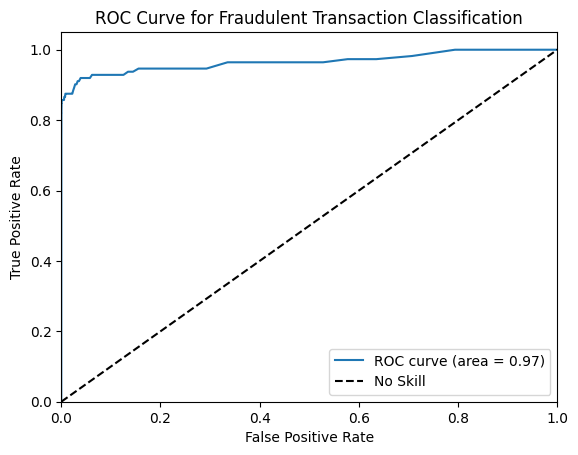

CPU times: user 1.72 s, sys: 151 ms, total: 1.87 s
Wall time: 1.6 s


In [44]:
%%time
random_balanced_model = RandomForestClassifier()
train_accuracy, test_accuracy = model_pred_result(train_scaled_under_sample_X, test_scaled_X, train_y_scaled_under_sample, test_y, random_balanced_model)

In [45]:
pd.Series(random_balanced_model.feature_importances_,index= random_balanced_model.feature_names_in_).sort_values(ascending=False)[:10].index

Index(['V14', 'V4', 'V10', 'V12', 'V17', 'V11', 'V3', 'V16', 'V2', 'V7'], dtype='object')

In [46]:
random_balanced_model.feature_names_in_

array(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28', 'Amount'], dtype=object)

In [47]:
RandomForestClassifier()

RandomForestClassifier()

In [ ]:
# Hyper paramneter Tuning - GridSearch

param_grid = {
    'n_estimators' : [50, 100, 150, 200, 250, 300],
    'criterion' : ['gini','entropy'],
    'max_depth' : [1,2,3,4,5,6,7,8,9,10],
    'class_weight' : [None, "balanced", "balanced_subsample"]
}

grid = GridSearchCV(estimator = random_balanced_model, param_grid=param_grid, cv= 10, verbose=2, scoring='f1')

In [ ]:
%%time
grid.fit(train_scaled_under_sample_X, train_y_scaled_under_sample)

In [ ]:
grid.best_estimator_

In [ ]:
grid.best_score_

In [ ]:
grid.feature_names_in_

In [48]:
model = RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=8, n_estimators=50)

model.fit(train_scaled_under_sample_X, train_y_scaled_under_sample)

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=8, n_estimators=50)

In [49]:
model.feature_importances_

array([0.00638353, 0.00599883, 0.01597696, 0.06530089, 0.09809159,
       0.01156526, 0.0049952 , 0.03933018, 0.01388841, 0.01111313,
       0.07184348, 0.10501876, 0.10839439, 0.01158432, 0.14564915,
       0.00428884, 0.04513226, 0.11391464, 0.02394804, 0.01343465,
       0.00923677, 0.01222258, 0.00587895, 0.00980458, 0.00571403,
       0.00431142, 0.00978566, 0.00772879, 0.00661416, 0.01285056])

In [50]:
model.feature_names_in_

array(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28', 'Amount'], dtype=object)

<Axes: >

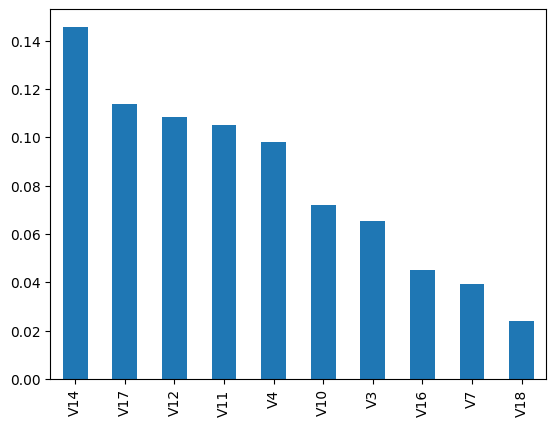

In [51]:
pd.Series(model.feature_importances_,index= model.feature_names_in_).sort_values(ascending=False)[:10].plot(kind = 'bar')

Train Accuracy :  0.9947368421052631
Test Accuracy :  0.9836908816403919
Train Report : 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       380
           1       1.00      0.99      0.99       380

    accuracy                           0.99       760
   macro avg       0.99      0.99      0.99       760
weighted avg       0.99      0.99      0.99       760

Test Report : 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56850
           1       0.10      0.89      0.18       112

    accuracy                           0.98     56962
   macro avg       0.55      0.94      0.58     56962
weighted avg       1.00      0.98      0.99     56962

Train Confusion. Matrix : 
 [[380   0]
 [  4 376]]
Test Confusion. Matrix  : 
 [[55933   917]
 [   12   100]]
TRAIN ROC AUC SCORE  : 
 0.9947368421052631
Test ROC AUC SCORE  : 
 0.9383634878753612


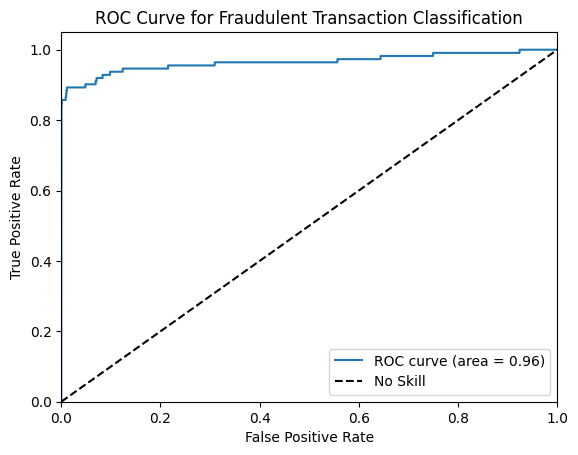

In [52]:
train_accuracy, test_accuracy = model_pred_result(train_scaled_under_sample_X, test_scaled_X, train_y_scaled_under_sample, test_y, model)

In [53]:
top_feature = pd.Series(model.feature_importances_,index= model.feature_names_in_).sort_values(ascending=False)[:10].index.values

Train Accuracy :  0.9921052631578947
Test Accuracy :  0.975053544468242
Train Report : 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       380
           1       1.00      0.98      0.99       380

    accuracy                           0.99       760
   macro avg       0.99      0.99      0.99       760
weighted avg       0.99      0.99      0.99       760

Test Report : 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56850
           1       0.07      0.89      0.12       112

    accuracy                           0.98     56962
   macro avg       0.53      0.93      0.56     56962
weighted avg       1.00      0.98      0.99     56962

Train Confusion. Matrix : 
 [[380   0]
 [  6 374]]
Test Confusion. Matrix  : 
 [[55441  1409]
 [   12   100]]
TRAIN ROC AUC SCORE  : 
 0.9921052631578947
Test ROC AUC SCORE  : 
 0.9340363110943587


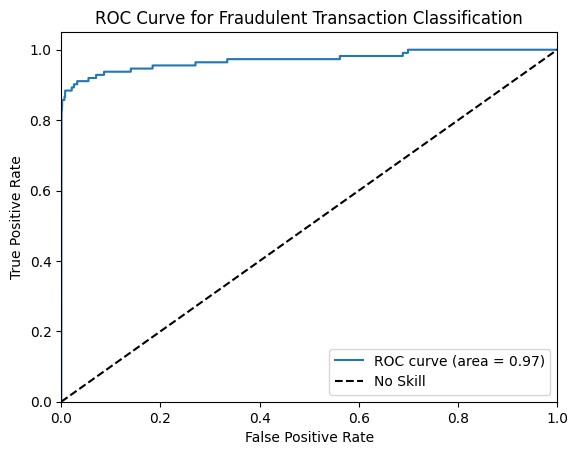

In [54]:
train_accuracy, test_accuracy = model_pred_result(train_scaled_under_sample_X[top_feature], test_scaled_X[top_feature], train_y_scaled_under_sample, test_y, model)

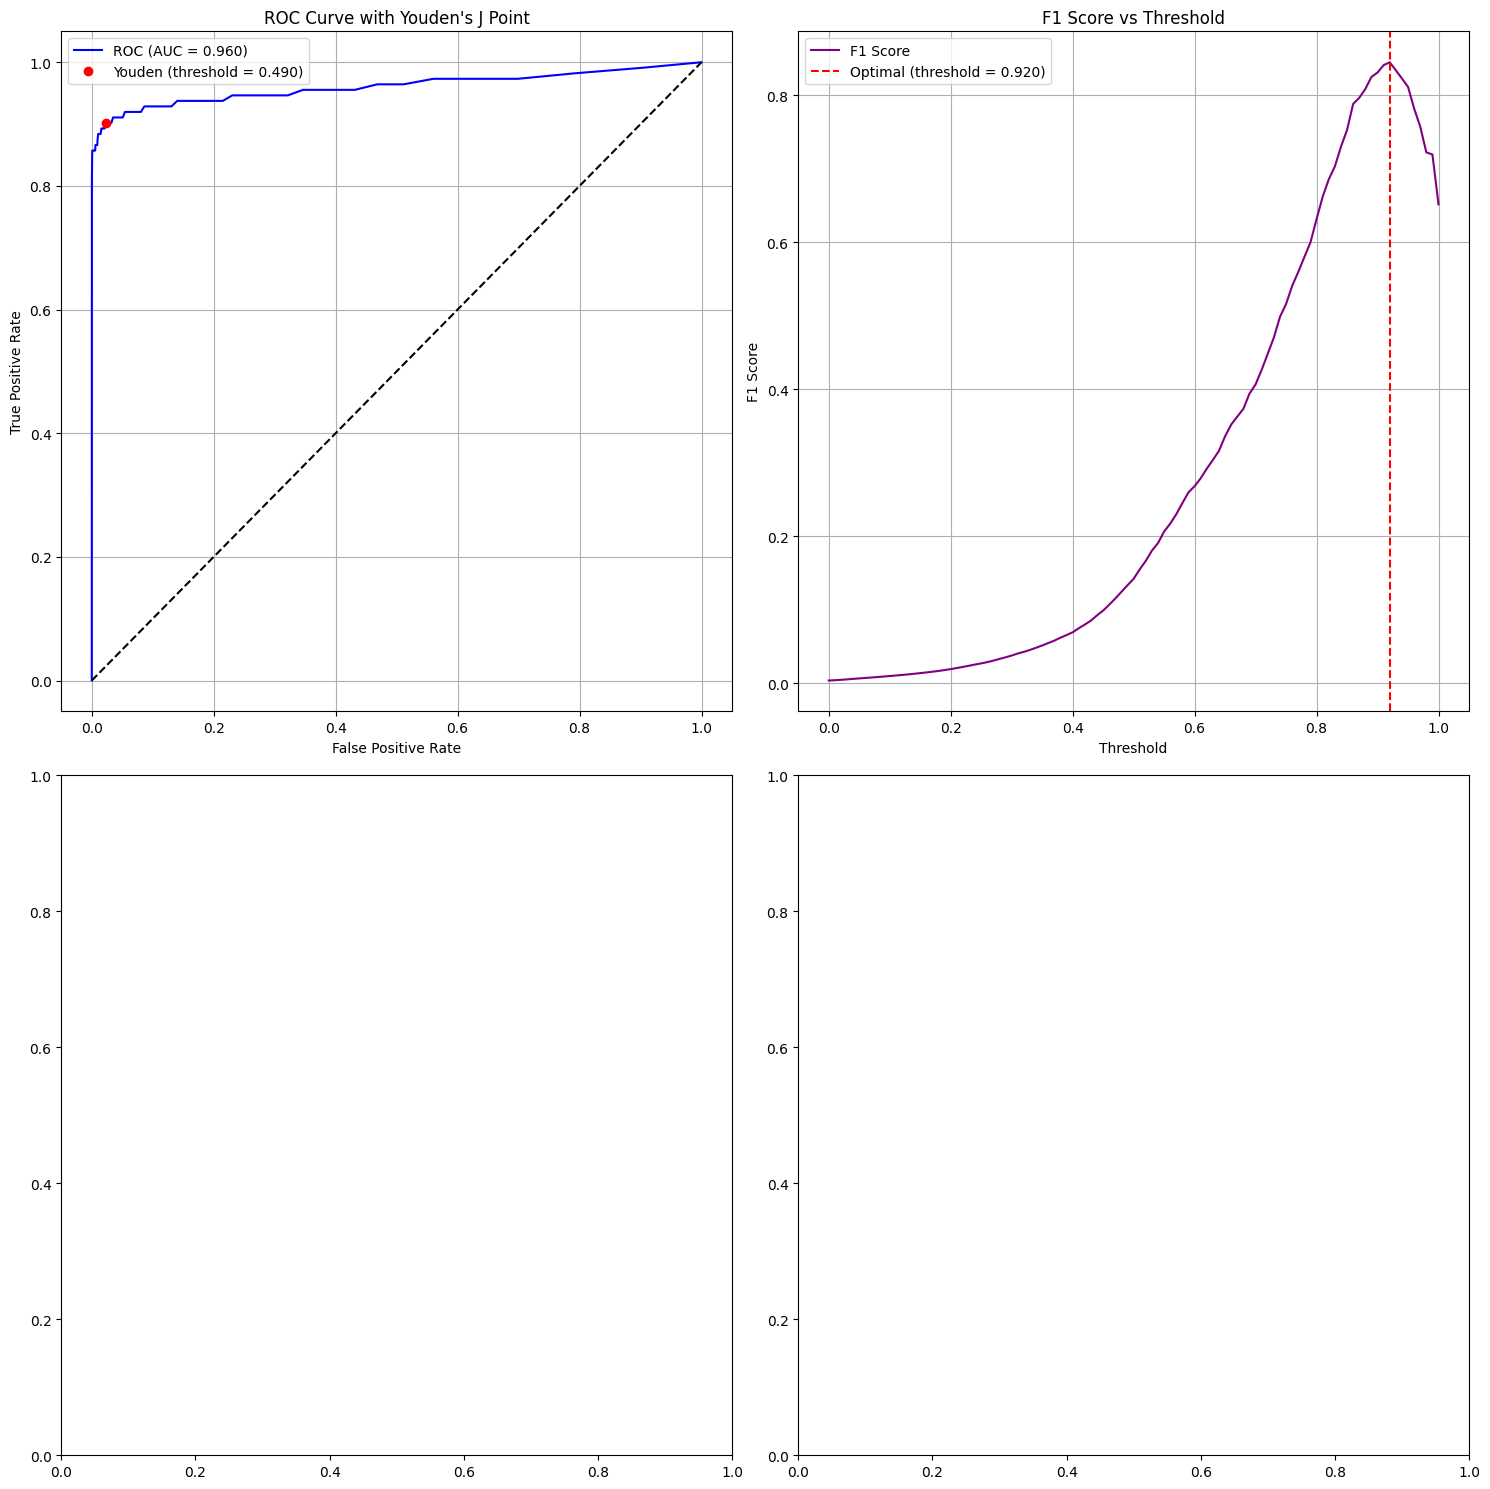


Optimal Thresholds:

Youden Method:
threshold: 0.490
tpr: 0.902
fpr: 0.023

Performance metrics:
accuracy: 0.977
precision: 0.072
recall: 0.902
f1_score: 0.134

F1 Method:
threshold: 0.920
precision: 0.891
recall: 0.804

Performance metrics:
accuracy: 0.999
precision: 0.891
recall: 0.804
f1_score: 0.845


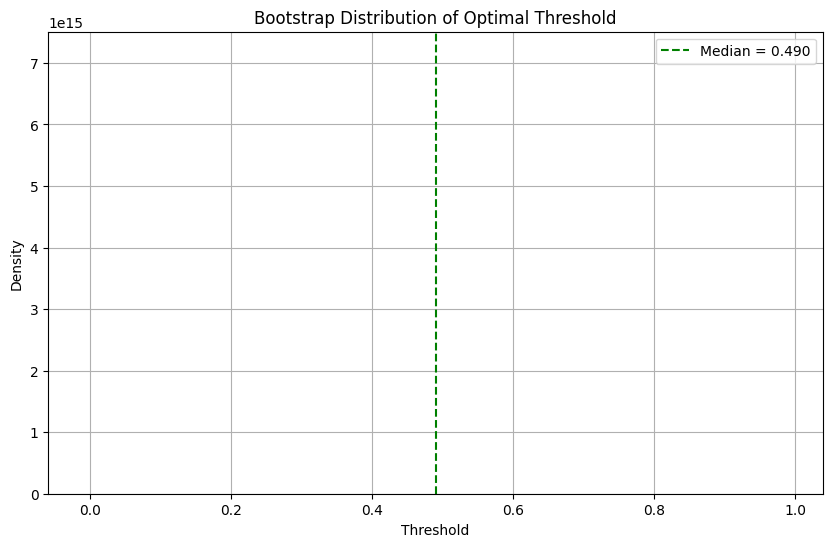


Bootstrap Analysis:
median: 0.490
mean: 0.490
std: 0.000
95% CI: [0.490, 0.490]


In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, f1_score, accuracy_score
from scipy.stats import gaussian_kde

def find_optimal_threshold(y_true, y_pred_proba, plot=True):
    """
    Find optimal threshold using multiple methods
    """
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    
    # Method 1: Youden's J statistic (max(tpr - fpr))
    J = tpr - fpr
    optimal_idx_youden = np.argmax(J)
    optimal_threshold_youden = thresholds[optimal_idx_youden]
    
#     # Method 2: Geometric mean of TPR and TNR
#     geometric_mean = np.sqrt(tpr * (1-fpr))
#     optimal_idx_geometric = np.argmax(geometric_mean)
#     optimal_threshold_geometric = thresholds[optimal_idx_geometric]
    
#     # Method 3: Closest point to (0,1)
#     distances = np.sqrt(fpr**2 + (1-tpr)**2)
#     optimal_idx_distance = np.argmin(distances)
#     optimal_threshold_distance = thresholds[optimal_idx_distance]
    
    # Method 4: F1 Score
    precision, recall, thresholds_pr = precision_recall_curve(y_true, y_pred_proba)
    f1_scores = 2 * (precision * recall) / (precision + recall)
    optimal_idx_f1 = np.argmax(f1_scores[:-1])  # Exclude last point
    optimal_threshold_f1 = thresholds_pr[optimal_idx_f1]
    
    if plot:
        # Create figure with subplots
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 15))
        
        # Plot 1: ROC curve with Youden's J
        ax1.plot(fpr, tpr, 'b-', label=f'ROC (AUC = {auc(fpr, tpr):.3f})')
        ax1.plot([0, 1], [0, 1], 'k--')
        ax1.plot(fpr[optimal_idx_youden], tpr[optimal_idx_youden], 'ro', 
                label=f'Youden (threshold = {optimal_threshold_youden:.3f})')
        ax1.set_xlabel('False Positive Rate')
        ax1.set_ylabel('True Positive Rate')
        ax1.set_title("ROC Curve with Youden's J Point")
        ax1.legend()
        ax1.grid(True)
        
#         # Plot 2: Geometric Mean
#         ax2.plot(thresholds, geometric_mean[:-1], 'g-', label='Geometric Mean')
#         ax2.axvline(optimal_threshold_geometric, color='r', linestyle='--',
#                    label=f'Optimal (threshold = {optimal_threshold_geometric:.3f})')
#         ax2.set_xlabel('Threshold')
#         ax2.set_ylabel('Geometric Mean of TPR & TNR')
#         ax2.set_title('Geometric Mean vs Threshold')
#         ax2.legend()
#         ax2.grid(True)
        
#         # Plot 3: Distance to (0,1)
#         ax3.plot(thresholds, distances[:-1], 'b-', label='Distance to (0,1)')
#         ax3.axvline(optimal_threshold_distance, color='r', linestyle='--',
#                    label=f'Optimal (threshold = {optimal_threshold_distance:.3f})')
#         ax3.set_xlabel('Threshold')
#         ax3.set_ylabel('Distance to (0,1)')
#         ax3.set_title('Distance to (0,1) vs Threshold')
#         ax3.legend()
#         ax3.grid(True)
        
        # Plot 4: F1 Score
        ax2.plot(thresholds_pr, f1_scores[:-1], 'purple', label='F1 Score')
        ax2.axvline(optimal_threshold_f1, color='r', linestyle='--',
                   label=f'Optimal (threshold = {optimal_threshold_f1:.3f})')
        ax2.set_xlabel('Threshold')
        ax2.set_ylabel('F1 Score')
        ax2.set_title('F1 Score vs Threshold')
        ax2.legend()
        ax2.grid(True)
        
        plt.tight_layout()
        plt.show()
    
    # Create results dictionary
    results = {
        'youden': {
            'threshold': optimal_threshold_youden,
            'tpr': tpr[optimal_idx_youden],
            'fpr': fpr[optimal_idx_youden]
        },
#         'geometric': {
#             'threshold': optimal_threshold_geometric,
#             'tpr': tpr[optimal_idx_geometric],
#             'fpr': fpr[optimal_idx_geometric]
#         },
#         'distance': {
#             'threshold': optimal_threshold_distance,
#             'tpr': tpr[optimal_idx_distance],
#             'fpr': fpr[optimal_idx_distance]
#         },
        'f1': {
            'threshold': optimal_threshold_f1,
            'precision': precision[optimal_idx_f1],
            'recall': recall[optimal_idx_f1]
        }
    }
    
    return results

def evaluate_threshold_performance(y_true, y_pred_proba, threshold):
    """
    Evaluate model performance at specific threshold
    """
    y_pred = (y_pred_proba >= threshold).astype(int)
    
    # Calculate metrics
    TP = np.sum((y_pred == 1) & (y_true == 1))
    TN = np.sum((y_pred == 0) & (y_true == 0))
    FP = np.sum((y_pred == 1) & (y_true == 0))
    FN = np.sum((y_pred == 0) & (y_true == 1))
    
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'confusion_matrix': {
            'TP': TP, 'TN': TN,
            'FP': FP, 'FN': FN
        }
    }

def find_threshold_distribution(y_true, y_pred_proba, n_bootstraps=1000):
    """
    Find threshold distribution using bootstrap sampling
    """
    thresholds = []
    n_samples = len(y_true)
    
    for _ in range(n_bootstraps):
        # Bootstrap sampling
        sample_true = y_true
        sample_pred = y_pred_proba
        
        # Find optimal threshold using Youden's J
        fpr, tpr, thresh = roc_curve(sample_true, sample_pred)
        optimal_idx = np.argmax(tpr - fpr)
        thresholds.append(thresh[optimal_idx])
    
    # Plot threshold distribution
    plt.figure(figsize=(10, 6))
    plt.hist(thresholds, bins=50, density=True, alpha=0.7)
    
    # Add density curve
    density = gaussian_kde(thresholds)
    xs = np.linspace(min(thresholds), max(thresholds), 200)
    plt.plot(xs, density(xs), 'r-', lw=2)
    
    plt.axvline(np.median(thresholds), color='g', linestyle='--',
                label=f'Median = {np.median(thresholds):.3f}')
    plt.xlabel('Threshold')
    plt.ylabel('Density')
    plt.title('Bootstrap Distribution of Optimal Threshold')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return {
        'median': np.median(thresholds),
        'mean': np.mean(thresholds),
        'std': np.std(thresholds),
        '95_ci': np.percentile(thresholds, [2.5, 97.5])
    }

# Example usage
def main():
    # Generate sample data
    from sklearn.datasets import make_classification
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestClassifier
    
    
    # Train model
    model = RandomForestClassifier(random_state=42)
    model.fit(train_scaled_under_sample_X, train_y_scaled_under_sample)
    
    # Get predictions
    y_pred_proba = model.predict_proba(test_scaled_X)[:, 1]
    
    # Find optimal thresholds
    results = find_optimal_threshold(test_y, y_pred_proba)
    
    # Print results
    print("\nOptimal Thresholds:")
    for method, vals in results.items():
        print(f"\n{method.capitalize()} Method:")
        for metric, value in vals.items():
            print(f"{metric}: {value:.3f}")
        
        # Evaluate performance at this threshold
        if 'threshold' in vals:
            performance = evaluate_threshold_performance(test_y, y_pred_proba, vals['threshold'])
            print("\nPerformance metrics:")
            for metric, value in performance.items():
                if metric != 'confusion_matrix':
                    print(f"{metric}: {value:.3f}")
    
    # Find threshold distribution
    bootstrap_results = find_threshold_distribution(test_y, y_pred_proba)
    print("\nBootstrap Analysis:")
    for metric, value in bootstrap_results.items():
        if metric == '95_ci':
            print(f"95% CI: [{value[0]:.3f}, {value[1]:.3f}]")
        else:
            print(f"{metric}: {value:.3f}")
main()

In [91]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


Train Accuracy :  1.0
Test Accuracy :  0.9611670938520417
Train Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       380
           1       1.00      1.00      1.00       380

    accuracy                           1.00       760
   macro avg       1.00      1.00      1.00       760
weighted avg       1.00      1.00      1.00       760

Test Report : 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     56850
           1       0.04      0.90      0.08       112

    accuracy                           0.96     56962
   macro avg       0.52      0.93      0.53     56962
weighted avg       1.00      0.96      0.98     56962

Train Confusion. Matrix : 
 [[380   0]
 [  0 380]]
Test Confusion. Matrix  : 
 [[54649  2201]
 [   11   101]]
TRAIN ROC AUC SCORE  : 
 1.0
Test ROC AUC SCORE  : 
 0.931534897600201


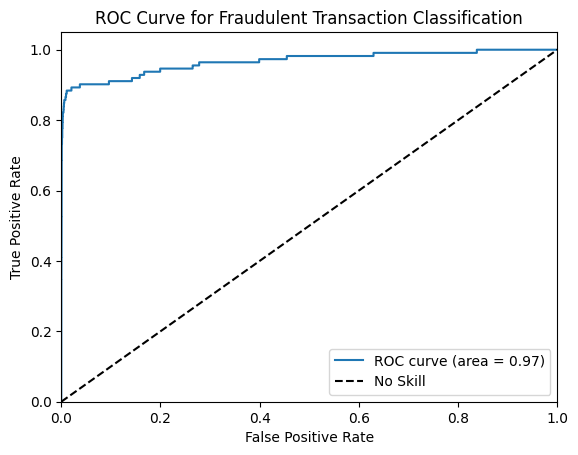

In [64]:
model = AdaBoostClassifier(n_estimators=200)
train_accuracy, test_accuracy = model_pred_result(train_scaled_under_sample_X, test_scaled_X, train_y_scaled_under_sample, test_y, model)

Train Accuracy :  1.0
Test Accuracy :  0.967574874477722
Train Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       380
           1       1.00      1.00      1.00       380

    accuracy                           1.00       760
   macro avg       1.00      1.00      1.00       760
weighted avg       1.00      1.00      1.00       760

Test Report : 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     56850
           1       0.05      0.92      0.10       112

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962

Train Confusion. Matrix : 
 [[380   0]
 [  0 380]]
Test Confusion. Matrix  : 
 [[55012  1838]
 [    9   103]]
TRAIN ROC AUC SCORE  : 
 1.0
Test ROC AUC SCORE  : 
 0.9436560811659757


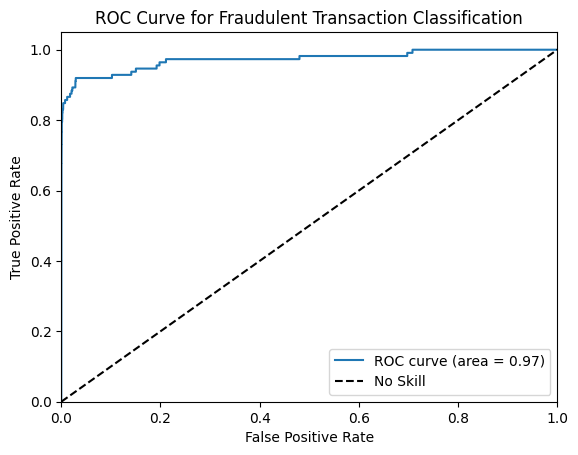

In [66]:
model = GradientBoostingClassifier(n_estimators = 500)
train_accuracy, test_accuracy = model_pred_result(train_scaled_under_sample_X, test_scaled_X, train_y_scaled_under_sample, test_y, model)

In [67]:
import xgboost as xgb

In [72]:
clf = xgb.XGBClassifier(eval_metric='auc')

Train Accuracy :  1.0
Test Accuracy :  0.9733506548225133
Train Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       380
           1       1.00      1.00      1.00       380

    accuracy                           1.00       760
   macro avg       1.00      1.00      1.00       760
weighted avg       1.00      1.00      1.00       760

Test Report : 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56850
           1       0.06      0.91      0.12       112

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.97      0.98     56962

Train Confusion. Matrix : 
 [[380   0]
 [  0 380]]
Test Confusion. Matrix  : 
 [[55342  1508]
 [   10   102]]
TRAIN ROC AUC SCORE  : 
 1.0
Test ROC AUC SCORE  : 
 0.9420941701218746


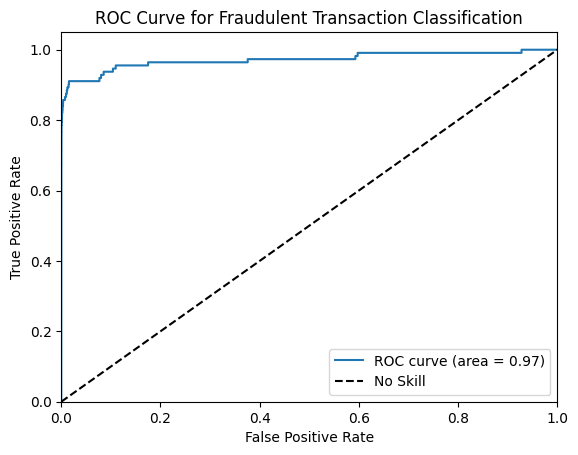

In [73]:
train_accuracy, test_accuracy = model_pred_result(train_scaled_under_sample_X, test_scaled_X, train_y_scaled_under_sample, test_y, clf)

In [82]:
clf1 = RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=8, n_estimators=50)
clf2 = GradientBoostingClassifier() 
clf3 = xgb.XGBClassifier(eval_metric='auc')

voting_model = VotingClassifier(estimators=[('rf', clf1), ('gbm', clf2), ('lr', clf3)], voting='soft')

Train Accuracy :  1.0
Test Accuracy :  0.9757908781292791
Train Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       380
           1       1.00      1.00      1.00       380

    accuracy                           1.00       760
   macro avg       1.00      1.00      1.00       760
weighted avg       1.00      1.00      1.00       760

Test Report : 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56850
           1       0.07      0.91      0.13       112

    accuracy                           0.98     56962
   macro avg       0.53      0.94      0.56     56962
weighted avg       1.00      0.98      0.99     56962

Train Confusion. Matrix : 
 [[380   0]
 [  0 380]]
Test Confusion. Matrix  : 
 [[55481  1369]
 [   10   102]]
TRAIN ROC AUC SCORE  : 
 1.0
Test ROC AUC SCORE  : 
 0.9433166855132554


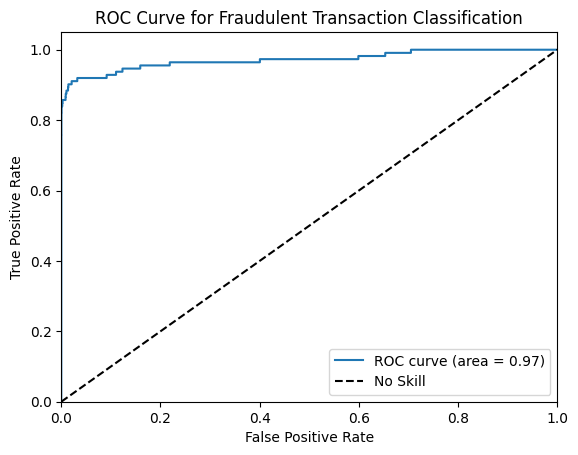

In [83]:
train_accuracy, test_accuracy = model_pred_result(train_scaled_under_sample_X, test_scaled_X, train_y_scaled_under_sample, test_y, voting_model)

In [92]:
clf1 = RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=8, n_estimators=50)
clf2 = GradientBoostingClassifier() 
clf3 = xgb.XGBClassifier(eval_metric='auc')
clf4 = AdaBoostClassifier()

voting_model = VotingClassifier(estimators=[('rf', clf1), ('gbm', clf2), ('lr', clf3), ('dt', clf4)], voting='soft')

Train Accuracy :  1.0
Test Accuracy :  0.9761946560865138
Train Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       380
           1       1.00      1.00      1.00       380

    accuracy                           1.00       760
   macro avg       1.00      1.00      1.00       760
weighted avg       1.00      1.00      1.00       760

Test Report : 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56850
           1       0.07      0.91      0.13       112

    accuracy                           0.98     56962
   macro avg       0.54      0.94      0.56     56962
weighted avg       1.00      0.98      0.99     56962

Train Confusion. Matrix : 
 [[380   0]
 [  0 380]]
Test Confusion. Matrix  : 
 [[55504  1346]
 [   10   102]]
TRAIN ROC AUC SCORE  : 
 1.0
Test ROC AUC SCORE  : 
 0.9435189722326925


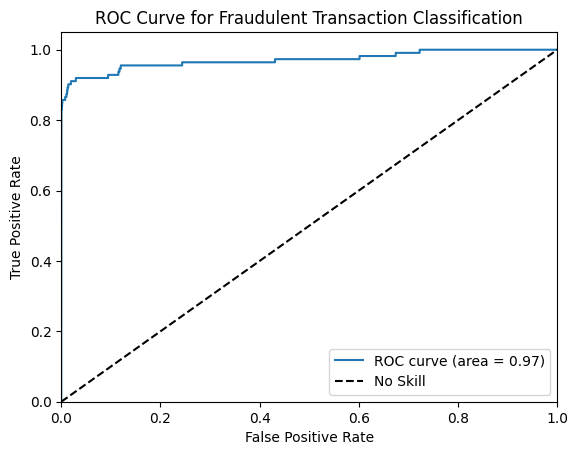

In [93]:
train_accuracy, test_accuracy = model_pred_result(train_scaled_under_sample_X, test_scaled_X, train_y_scaled_under_sample, test_y, voting_model)

1. Hard Voting
Definition: Uses the predicted class labels from each classifier and selects the class that gets the most votes (i.e., the majority).
Example:
Suppose you have three classifiers (A, B, and C) predicting classes for a sample:
A predicts: Class 1
B predicts: Class 1
C predicts: Class 2
Result: Class 1 wins with 2 votes, so the ensemble predicts Class 1.
2. Soft Voting
Definition: Uses the predicted probabilities from each classifier and sums them up to choose the class with the highest probability.
Example:
Using the same classifiers (A, B, and C):
A predicts probabilities: Class 1 (0.7), Class 2 (0.3)
B predicts probabilities: Class 1 (0.6), Class 2 (0.4)
C predicts probabilities: Class 1 (0.4), Class 2 (0.6)
Summed Probabilities:
Class 1: 0.7 + 0.6 + 0.4 = 1.7
Class 2: 0.3 + 0.4 + 0.6 = 1.3
Result: Class 1 is chosen as it has the highest summed probability (1.7).

In [90]:
#Stacking

In [100]:
estimators = [
    ('rf1', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('rf2', RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=8, n_estimators=50)),
    ('gbm', GradientBoostingClassifier()),
    ('ada', AdaBoostClassifier(n_estimators=200))
    
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

Train Accuracy :  1.0
Test Accuracy :  0.9694182086303149
Train Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       380
           1       1.00      1.00      1.00       380

    accuracy                           1.00       760
   macro avg       1.00      1.00      1.00       760
weighted avg       1.00      1.00      1.00       760

Test Report : 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     56850
           1       0.06      0.92      0.11       112

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.97      0.98     56962

Train Confusion. Matrix : 
 [[380   0]
 [  0 380]]
Test Confusion. Matrix  : 
 [[55117  1733]
 [    9   103]]
TRAIN ROC AUC SCORE  : 
 1.0
Test ROC AUC SCORE  : 
 0.9445795640155797


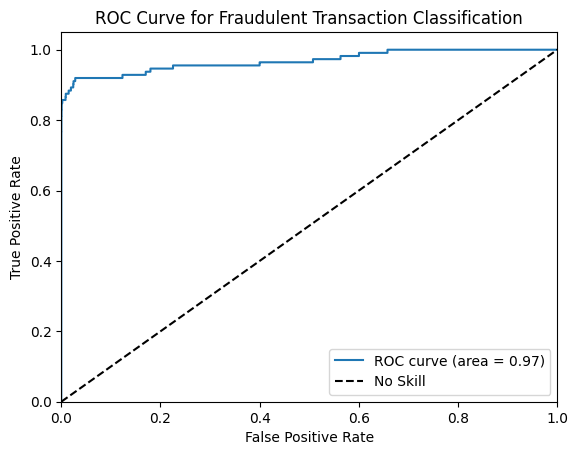

In [101]:
train_accuracy, test_accuracy = model_pred_result(train_scaled_under_sample_X, test_scaled_X, train_y_scaled_under_sample, test_y, clf)

In [102]:
estimators = [
    ('rf1', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('rf2', RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=8, n_estimators=50)),
    ('gbm', GradientBoostingClassifier()),
    ('ada', AdaBoostClassifier(n_estimators=200)),
    ('voting',voting_model )
    
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

Train Accuracy :  1.0
Test Accuracy :  0.9702433201081423
Train Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       380
           1       1.00      1.00      1.00       380

    accuracy                           1.00       760
   macro avg       1.00      1.00      1.00       760
weighted avg       1.00      1.00      1.00       760

Test Report : 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     56850
           1       0.06      0.92      0.11       112

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.97      0.98     56962

Train Confusion. Matrix : 
 [[380   0]
 [  0 380]]
Test Confusion. Matrix  : 
 [[55164  1686]
 [    9   103]]
TRAIN ROC AUC SCORE  : 
 1.0
Test ROC AUC SCORE  : 
 0.9449929325292122


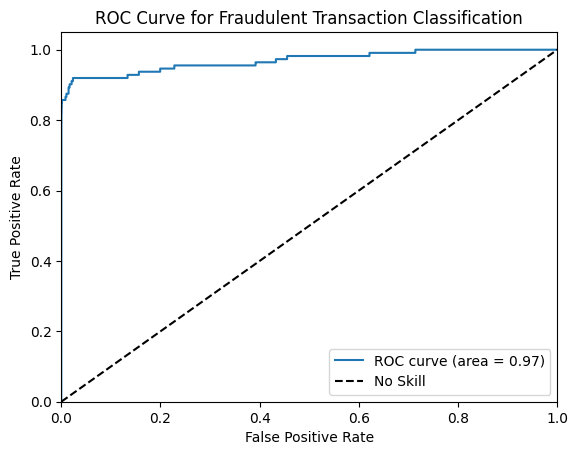

In [103]:
train_accuracy, test_accuracy = model_pred_result(train_scaled_under_sample_X, test_scaled_X, train_y_scaled_under_sample, test_y, clf)

In [ ]:
#Homework

Test Data

Model,                    Strategy,         Recall of Fraud,        F1 Score,      ROC Score
Logistic
Elastic
Lasso
KNN
Naive Bayes
Decision Tree
Random Forest
Tuned Decision Tree
Tuned Random Forest
AdaBoost
Tuned AdaBoost
GBM
XgBoost
Voting 1
Voting 2
Voting 3
Stacking 1
Stacking 2 
Stacking 3
Best Voting + Best Stacking

In [ ]:
0 - 100
1 - 10

Undersampling
0 - 10
1 - 10

Oversampling
0 - 100
1 - 100


Oversampling + Undersampling

0 - 100
1 - 20

0 - 20
1 - 20